In [5]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np

In [45]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [6]:
ALLEN_AI_SUBS_PATH = "../res/allenai/metadata_subset.csv"

In [7]:
df_allen = pd.read_csv(ALLEN_AI_SUBS_PATH)[['source_x', 'title', 'abstract', 'publish_time', 'journal', 'is_pr']]
df_allen = df_allen.fillna('')

print(len(df_allen.index))
df_allen.head(5)

58007


,source_x,title,abstract,publish_time,journal,is_pr
0,PMC,Sequence requirements for RNA strand transfer ...,Nidovirus subgenomic mRNAs contain a leader se...,2001-12-17,The EMBO Journal,True
1,PMC,"Crystal structure of murine sCEACAM1a[1,4]: a ...",CEACAM1 is a member of the carcinoembryonic an...,2002-05-01,The EMBO Journal,True
2,PMC,Synthesis of a novel hepatitis C virus protein...,Hepatitis C virus (HCV) is an important human ...,2001-07-16,EMBO J,True
3,PMC,Structure of coronavirus main proteinase revea...,The key enzyme in coronavirus polyprotein proc...,2002-07-01,The EMBO Journal,True
4,PMC,Discontinuous and non-discontinuous subgenomic...,"Arteri-, corona-, toro- and roniviruses are ev...",2002-12-01,The EMBO Journal,True


In [11]:
raw_txt = df_allen[['title', 'abstract']].agg(' - '.join, axis=1)
raw_txt.values

array(['Sequence requirements for RNA strand transfer during nidovirus discontinuous subgenomic RNA synthesis - Nidovirus subgenomic mRNAs contain a leader sequence derived from the 5′ end of the genome fused to different sequences (‘bodies’) derived from the 3′ end. Their generation involves a unique mechanism of discontinuous subgenomic RNA synthesis that resembles copy-choice RNA recombination. During this process, the nascent RNA strand is transferred from one site in the template to another, during either plus or minus strand synthesis, to yield subgenomic RNA molecules. Central to this process are transcription-regulating sequences (TRSs), which are present at both template sites and ensure the fidelity of strand transfer. Here we present results of a comprehensive co-variation mutagenesis study of equine arteritis virus TRSs, demonstrating that discontinuous RNA synthesis depends not only on base pairing between sense leader TRS and antisense body TRS, but also on the primary se

In [12]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(raw_txt)
print(dtm_tf.shape)

(58007, 20472)


In [14]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(raw_txt)
print(dtm_tfidf.shape)

E:\Python\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1577: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


(58007, 20472)


In [15]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=25, random_state=4325432)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=25, random_state=4325432)
lda_tfidf.fit(dtm_tfidf)

E:\Python\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
E:\Python\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=25, perp_tol=0.1,
             random_state=4325432, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [16]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

E:\Python\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
12    -0.155194 -0.127117       1        1  6.689491
10     0.234936  0.001446       2        1  6.167787
6      0.228563 -0.062025       3        1  5.957131
13    -0.125767  0.237982       4        1  5.929662
17     0.151534  0.129241       5        1  5.459096
11    -0.177367  0.081454       6        1  5.100375
5     -0.040956  0.124176       7        1  4.985813
19    -0.228090 -0.134984       8        1  4.924502
0     -0.152663  0.162939       9        1  4.735971
14    -0.019022 -0.001786      10        1  4.110883
2      0.211794  0.052131      11        1  4.101304
8      0.141971 -0.131375      12        1  4.046334
23    -0.175953 -0.106660      13        1  3.933206
18     0.051665 -0.076118      14        1  3.746745
15     0.005728  0.105526      15        1  3.718029
24    -0.064253  0.127732      16        1  3.640694
22     0.122398 -0.104103      17        1  3.513944
20     0.101227 -0.026613      18        1  3.502231
1     -0.011247 -0.222468      19        1  3.369243
21    -0.102606 -0.149472      20        1  3.052561
16     0.018840  0.070450      21        1  2.999504
4     -0.164677  0.001115      22        1  1.983474
9      0.018672 -0.034230      23        1  1.817180
7      0.175261  0.087336      24        1  1.682735
3     -0.044795 -0.004575      25        1  0.832102, topic_info=      Category          Freq           Term         Total  loglift  logprob
16834  Default  23652.000000           sars  23652.000000  30.0000  30.0000
5239   Default  20716.000000            cov  20716.000000  29.0000  29.0000
10159  Default  18727.000000      influenza  18727.000000  28.0000  28.0000
16351  Default  31011.000000    respiratory  31011.000000  27.0000  27.0000
14049  Default  27961.000000       patients  27961.000000  26.0000  26.0000
16599  Default  17651.000000            rna  17651.000000  25.0000  25.0000
246    Default  20744.000000             19  20744.000000  24.0000  24.0000
5251   Default  18849.000000          covid  18849.000000  23.0000  23.0000
3961   Default  28046.000000          cells  28046.000000  22.0000  22.0000
5141   Default  20916.000000    coronavirus  20916.000000  21.0000  21.0000
15336  Default  24800.000000        protein  24800.000000  20.0000  20.0000
9021   Default  19373.000000         health  19373.000000  19.0000  19.0000
11973  Default   8034.000000           mers   8034.000000  18.0000  18.0000
20010  Default  57402.000000          virus  57402.000000  17.0000  17.0000
19773  Default   9257.000000        vaccine   9257.000000  16.0000  16.0000
10107  Default  37817.000000      infection  37817.000000  15.0000  15.0000
18427  Default  10436.000000       syndrome  10436.000000  14.0000  14.0000
12075  Default   8987.000000           mice   8987.000000  13.0000  13.0000
5964   Default   9901.000000      detection   9901.000000  12.0000  12.0000
14086  Default  10043.000000            pcr  10043.000000  11.0000  11.0000
4144   Default   8608.000000       children   8608.000000  10.0000  10.0000
3958   Default  21107.000000           cell  21107.000000   9.0000   9.0000
20011  Default  24175.000000        viruses  24175.000000   8.0000   8.0000
3775   Default  13332.000000          cases  13332.000000   7.0000   7.0000
17209  Default  12392.000000         severe  12392.000000   6.0000   6.0000
1522   Default  13431.000000          acute  13431.000000   5.0000   5.0000
19975  Default  33469.000000          viral  33469.000000   4.0000   4.0000
15342  Default  12262.000000       proteins  12262.000000   3.0000   3.0000
16212  Default  10185.000000    replication  10185.000000   2.0000   2.0000
9746   Default  10846.000000         immune  10846.000000   1.0000   1.0000
...        ...           ...            ...           ...      ...      ...
18306  Topic25    265.315831            sur    266.273003   4.7854  -5.2645
7342   Topic25    

In [36]:
tf_cluster_assignment = lda_tf.transform(dtm_tf).argmax(axis=1)

#### Most common topics

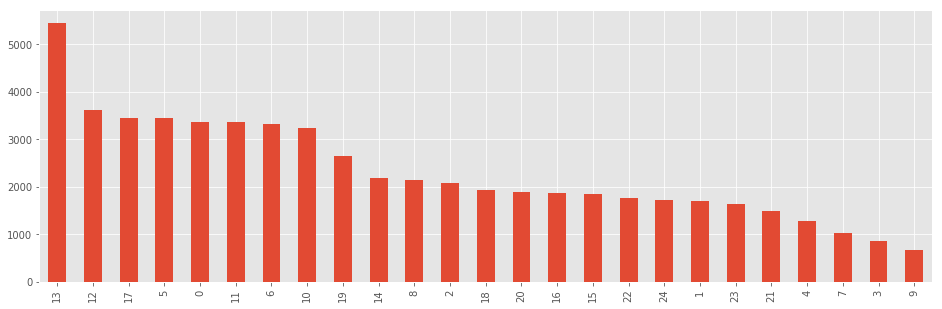

In [47]:
df_allen['tf_cluster'] = tf_cluster_assignment
df_allen.tf_cluster.value_counts().plot(kind='bar', figsize=(16,5))

#### Most common source per topic

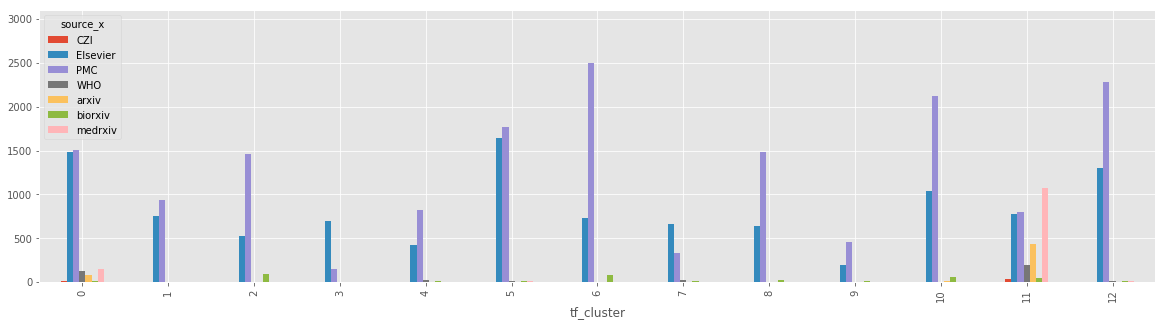

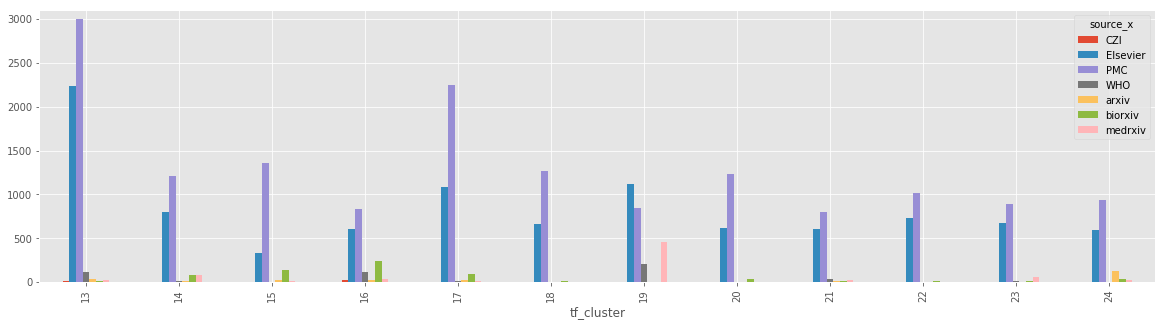

In [97]:
df_allen.query('tf_cluster < 13').groupby(['tf_cluster','source_x']).count().title.unstack().plot(kind='bar', figsize=(20,5), ylim=(0,3100))
df_allen.query('tf_cluster >= 13').groupby(['tf_cluster','source_x']).count().title.unstack().plot(kind='bar', figsize=(20,5), ylim=(0,3100))

#### Most common source (peer-reviewed / non-peer-reviewed)

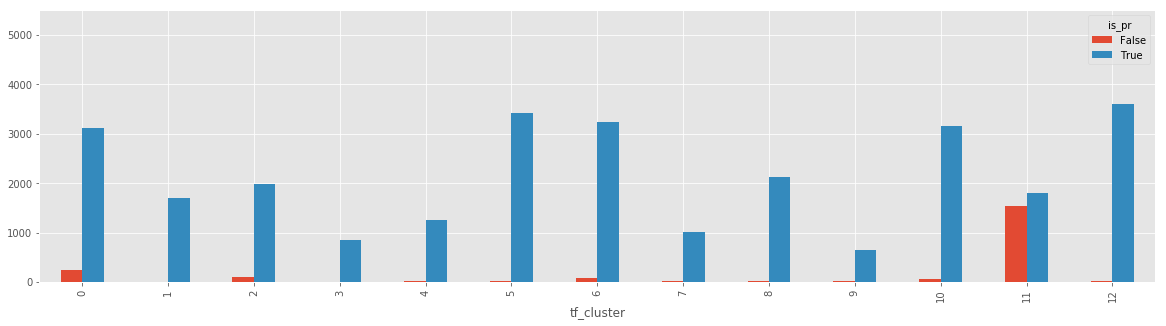

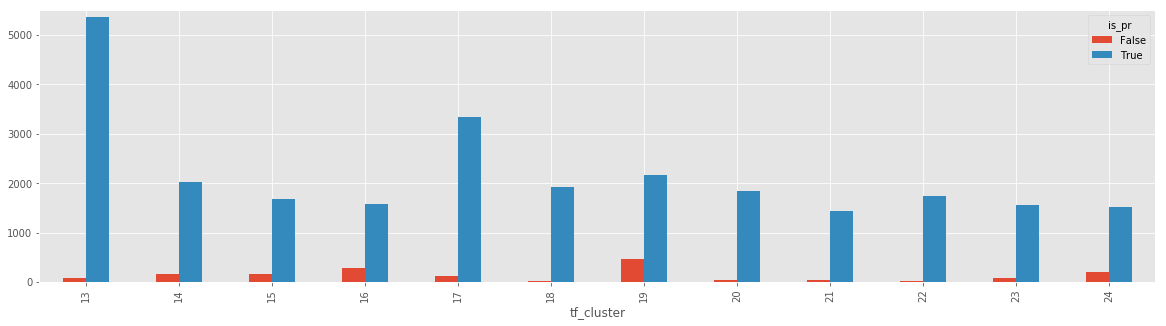

In [100]:
df_allen.query('tf_cluster < 13').groupby(['tf_cluster','is_pr']).count().title.unstack().plot(kind='bar', figsize=(20,5), ylim=(0,5500))
df_allen.query('tf_cluster >= 13').groupby(['tf_cluster','is_pr']).count().title.unstack().plot(kind='bar', figsize=(20,5), ylim=(0,5500))

#### Most common topic per source (relative)

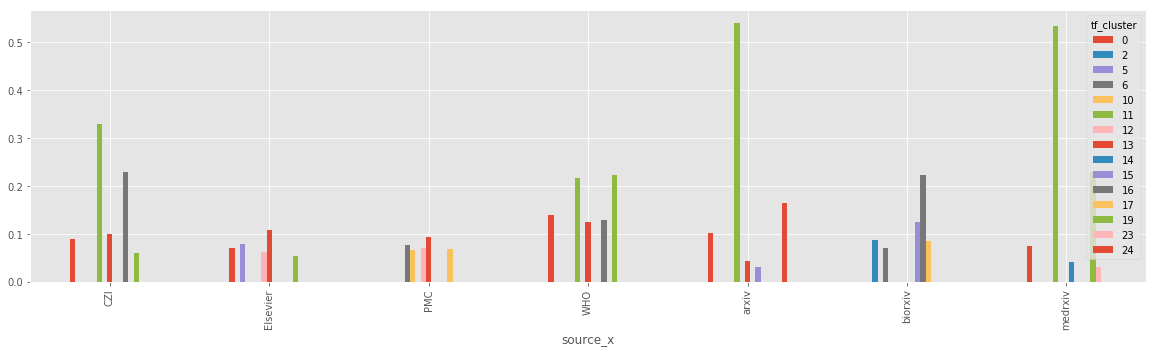

In [85]:
cl_p_source = df_allen.groupby(['source_x','tf_cluster'])['title'].count().unstack()
cl_p_source_rel = cl_p_source.div(cl_p_source.sum(axis=1), axis=0)
cl_p_source_rel.apply(lambda s: s.nlargest(5), axis=1).plot(kind='bar', figsize=(20,5))

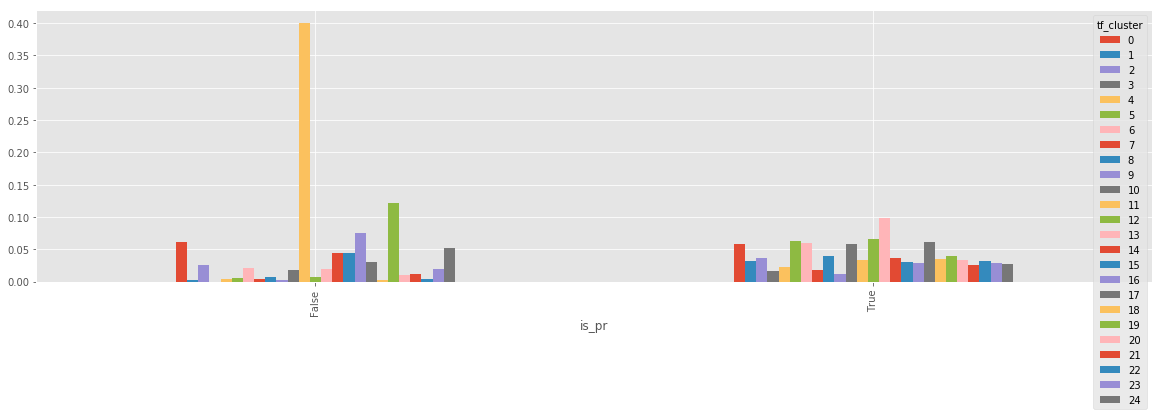

In [88]:
cl_p_source = df_allen.groupby(['is_pr','tf_cluster'])['title'].count().unstack()
cl_p_source_rel = cl_p_source.div(cl_p_source.sum(axis=1), axis=0)
cl_p_source_rel.plot(kind='bar', figsize=(20,5))

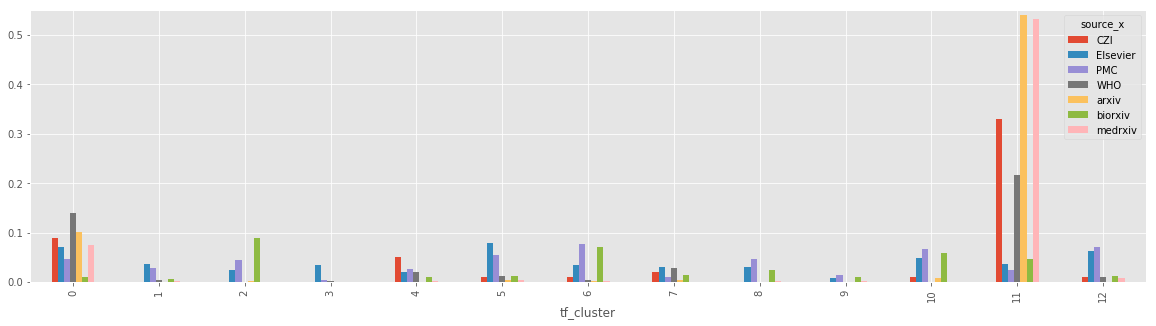

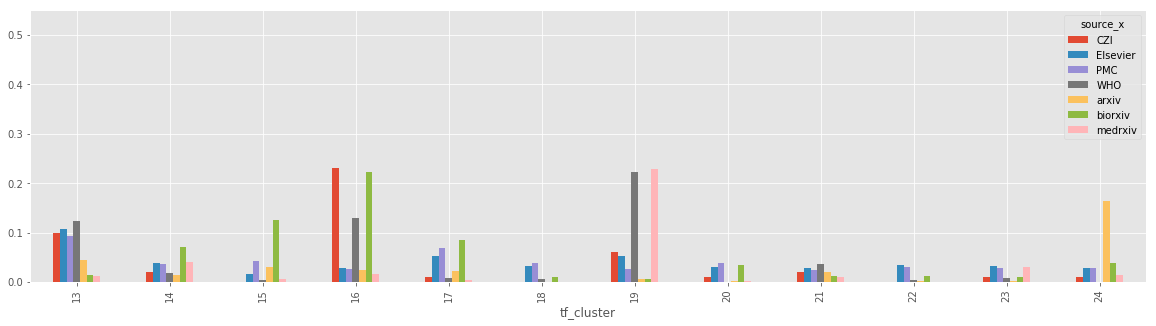

In [96]:
cl_p_source = df_allen.groupby(['source_x','tf_cluster'])['title'].count().unstack()
cl_p_source_rel = cl_p_source.div(cl_p_source.sum(axis=1), axis=0)
cl_p_source_rel.transpose().query('tf_cluster < 13').plot(kind='bar', figsize=(20,5), ylim=(0,0.55))
cl_p_source_rel.transpose().query('tf_cluster >= 13').plot(kind='bar', figsize=(20,5), ylim=(0,0.55))

In [101]:
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

E:\Python\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.191469 -0.134952       1        1  22.973750
12     0.207499 -0.063043       2        1  17.839784
10     0.226258  0.126231       3        1  16.252439
17     0.223091  0.114524       4        1  14.130923
18     0.237069  0.102667       5        1   6.149876
4      0.119459 -0.104531       6        1   1.923997
16     0.108553  0.029675       7        1   1.849466
1      0.085315  0.121123       8        1   1.813738
5      0.014646 -0.001951       9        1   1.603074
21     0.057880 -0.244297      10        1   1.543637
13     0.015773 -0.200905      11        1   1.431187
11    -0.047323 -0.031589      12        1   1.269374
3     -0.120776 -0.039538      13        1   1.203039
6     -0.078545  0.079290      14        1   1.128884
14    -0.141102 -0.018961      15        1   1.072707
8     -0.074095  0.115870      16        1   1.031460
2     -0.088968  0.068179      17        1   0.915850
24    -0.081297 -0.021968      18        1   0.884410
7     -0.136683  0.016080      19        1   0.755966
15    -0.100451 -0.003458      20        1   0.731904
19    -0.124727  0.008692      21        1   0.731805
22    -0.125657  0.021715      22        1   0.726446
20    -0.125876  0.012994      23        1   0.710881
9     -0.121146  0.021288      24        1   0.698120
23    -0.120365  0.026865      25        1   0.627284, topic_info=      Category         Freq            Term        Total  loglift  logprob
5251   Default  1045.000000           covid  1045.000000  30.0000  30.0000
246    Default  1040.000000              19  1040.000000  29.0000  29.0000
5239   Default   899.000000             cov   899.000000  28.0000  28.0000
11973  Default   490.000000            mers   490.000000  27.0000  27.0000
9021   Default   737.000000          health   737.000000  26.0000  26.0000
16351  Default   991.000000     respiratory   991.000000  25.0000  25.0000
16834  Default  1103.000000            sars  1103.000000  24.0000  24.0000
14049  Default   834.000000        patients   834.000000  23.0000  23.0000
5141   Default   856.000000     coronavirus   856.000000  22.0000  22.0000
10159  Default   717.000000       influenza   717.000000  21.0000  21.0000
18427  Default   481.000000        syndrome   481.000000  20.0000  20.0000
357    Default   366.000000            2019   366.000000  19.0000  19.0000
19773  Default   424.000000         vaccine   424.000000  18.0000  18.0000
13852  Default   446.000000        pandemic   446.000000  17.0000  17.0000
10109  Default   556.000000      infectious   556.000000  16.0000  16.0000
6249   Default   508.000000        diseases   508.000000  15.0000  15.0000
6247   Default   821.000000         disease   821.000000  14.0000  14.0000
12075  Default   342.000000            mice   342.000000  13.0000  13.0000
15461  Default   360.000000          public   360.000000  12.0000  12.0000
10977  Default   231.000000              la   231.000000  11.0000  11.0000
12147  Default   234.000000          middle   234.000000  10.0000  10.0000
6622   Default   229.000000            east   229.000000   9.0000   9.0000
1510   Default   338.000000        activity   338.000000   8.0000   8.0000
20010  Default  1290.000000           virus  1290.000000   7.0000   7.0000
6881   Default   311.000000        emerging   311.000000   6.0000   6.0000
8570   Default   296.000000          global   296.000000   5.0000   5.0000
2249   Default   347.000000       antiviral   347.000000   4.0000   4.0000
17209  Default   469.000000          severe   469.000000   3.0000   3.0000
19775  Default   295.000000        vaccines   295.000000   2.0000   2.0000
13152  Default   431.000000           novel   431.000000   1.0000   1.0000
...        ...          ...             ...          ...      ...      ...
16299  Topic25     4.636750       reshaping     5.785556   4.8502  -6.1899
13786  Topic25     4.514

In [102]:
tfidf_cluster_assignment = lda_tfidf.transform(dtm_tfidf).argmax(axis=1)

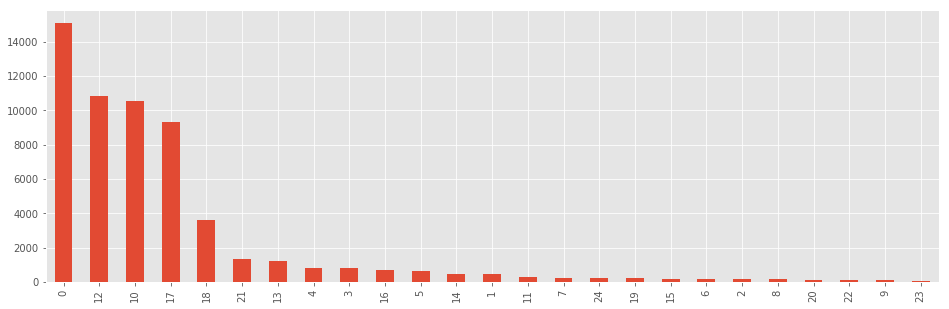

In [103]:
df_allen['tfidf_cluster'] = tfidf_cluster_assignment
df_allen.tfidf_cluster.value_counts().plot(kind='bar', figsize=(16,5))

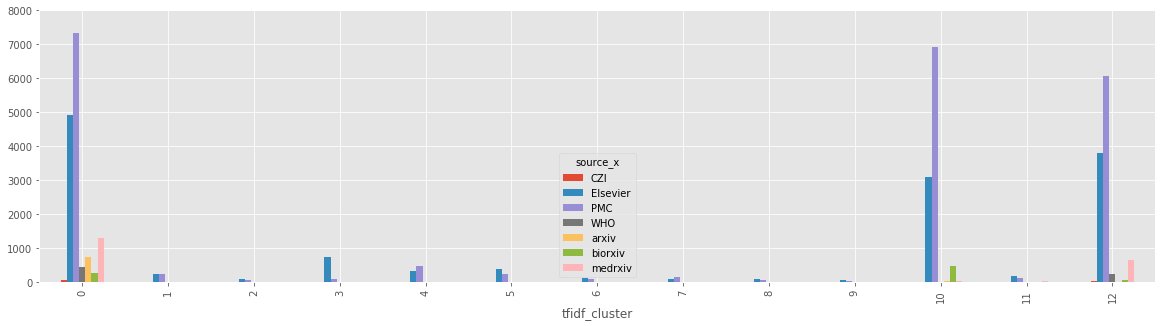

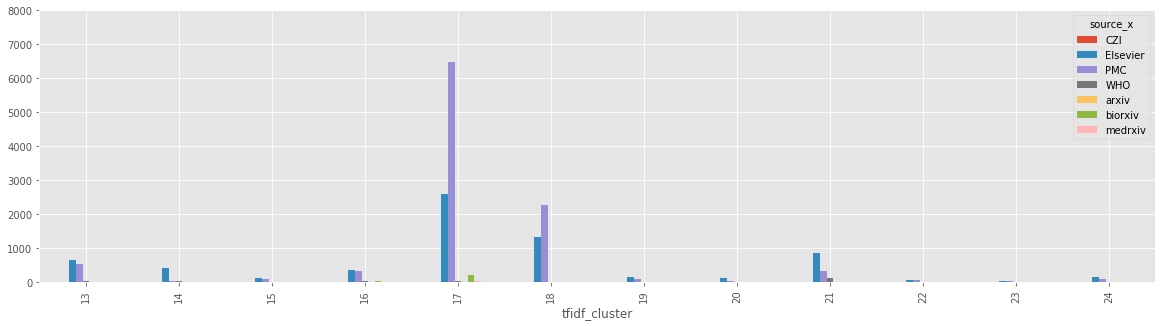

In [105]:
df_allen.query('tfidf_cluster < 13').groupby(['tfidf_cluster','source_x']).count().title.unstack().plot(kind='bar', figsize=(20,5), ylim=(0,8000))
df_allen.query('tfidf_cluster >= 13').groupby(['tfidf_cluster','source_x']).count().title.unstack().plot(kind='bar', figsize=(20,5), ylim=(0,8000))

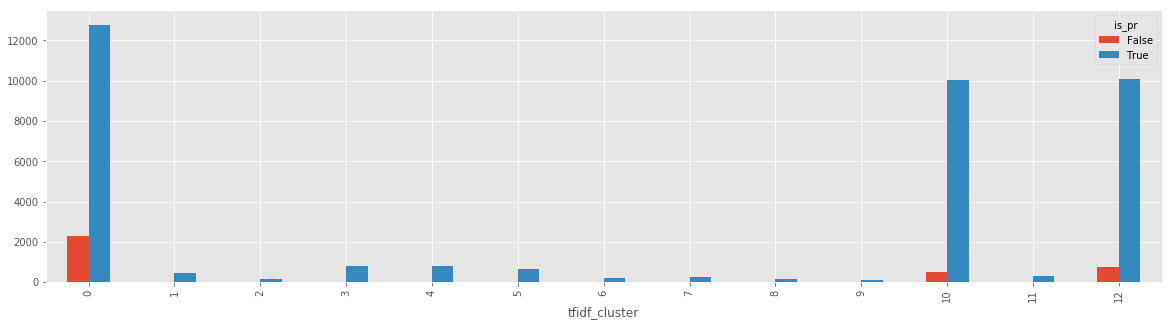

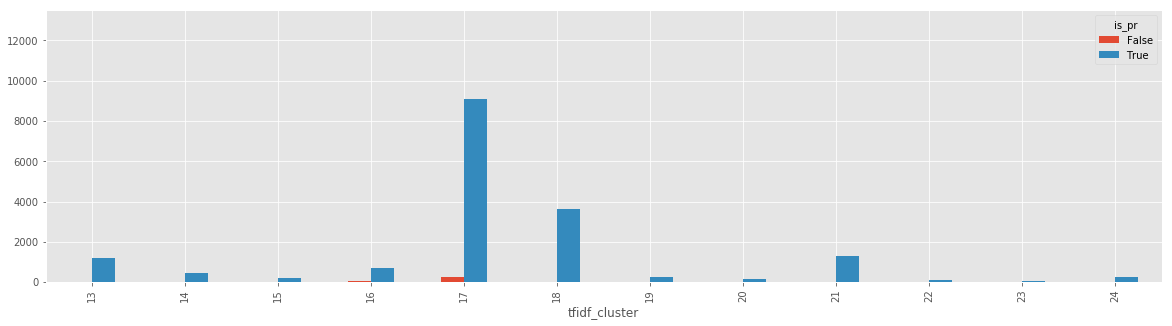

In [109]:
df_allen.query('tfidf_cluster < 13').groupby(['tfidf_cluster','is_pr']).count().title.unstack().plot(kind='bar', figsize=(20,5), ylim=(0,13500))
df_allen.query('tfidf_cluster >= 13').groupby(['tfidf_cluster','is_pr']).count().title.unstack().plot(kind='bar', figsize=(20,5), ylim=(0,13500))

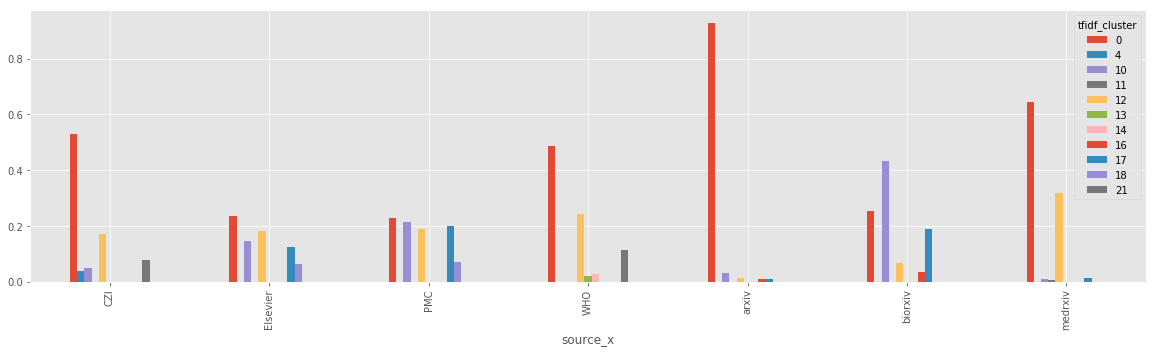

In [110]:
cl_p_source = df_allen.groupby(['source_x','tfidf_cluster'])['title'].count().unstack()
cl_p_source_rel = cl_p_source.div(cl_p_source.sum(axis=1), axis=0)
cl_p_source_rel.apply(lambda s: s.nlargest(5), axis=1).plot(kind='bar', figsize=(20,5))

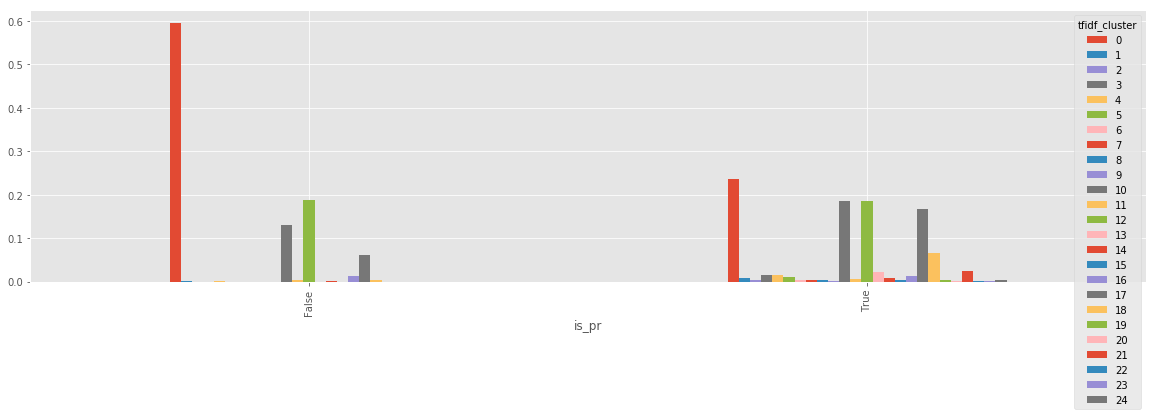

In [111]:
cl_p_source = df_allen.groupby(['is_pr','tfidf_cluster'])['title'].count().unstack()
cl_p_source_rel = cl_p_source.div(cl_p_source.sum(axis=1), axis=0)
cl_p_source_rel.plot(kind='bar', figsize=(20,5))

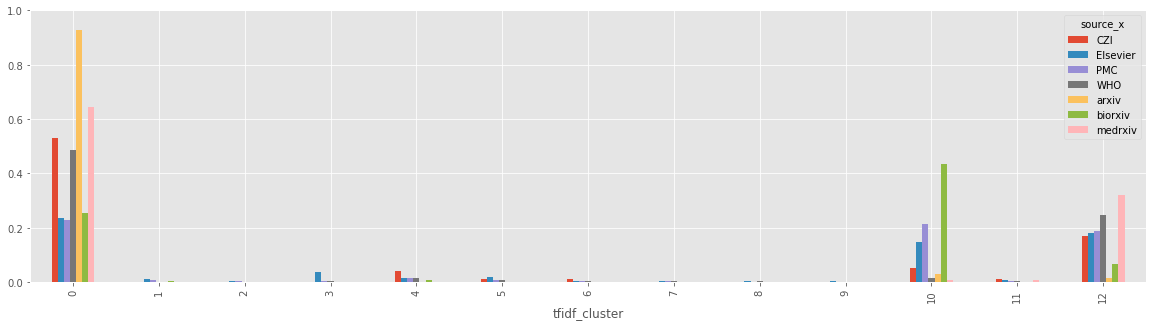

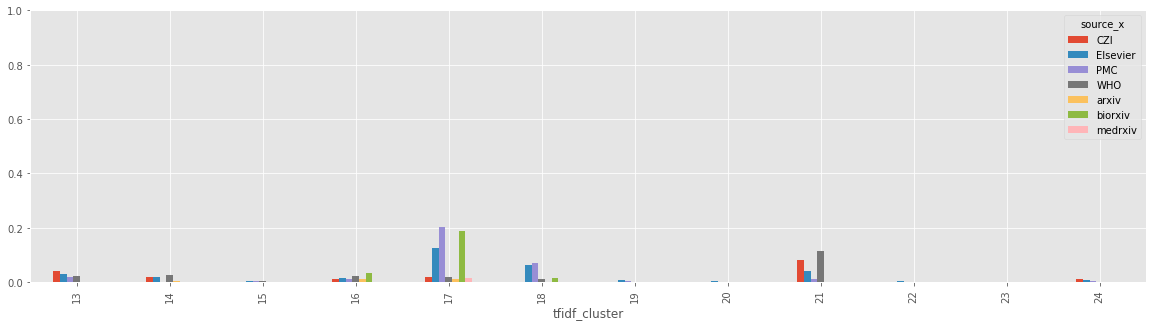

In [116]:
cl_p_source = df_allen.groupby(['source_x','tfidf_cluster'])['title'].count().unstack()
cl_p_source_rel = cl_p_source.div(cl_p_source.sum(axis=1), axis=0)
cl_p_source_rel.transpose().query('tfidf_cluster < 13').plot(kind='bar', figsize=(20,5), ylim=(0,1))
cl_p_source_rel.transpose().query('tfidf_cluster >= 13').plot(kind='bar', figsize=(20,5), ylim=(0,1))